/Users/laptopd/Documents/Compositionality/MLC-extension/src
* Setting all random seeds to  0 *
Loading model: /Users/laptopd/Documents/Compositionality/MLC-extension/src/out_models/net-HookedBIMLSmall.pt on cpu

Transformer specs:
 nparams= 930953
 nlayers_encoder= 2
 nlayers_decoder= 2
 nhead= 8
 hidden_size= 128
 dim_feedforward= 512
 act_feedforward= gelu
 dropout= 0.1
 



/Users/laptopd/Documents/Compositionality/MLC-extension/src/MI/hooked_transformer.py:298: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Users/laptopd/opt/anaconda3/envs/MI/lib/python3.10/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


[0.95475894 0.02097722]
[0.9313862  0.00860984]
receivers_chain: [[{'module': 'transformer.encoder.layers.1.self_attn.v_hook', 'head': 1}], [{'module': 'transformer.decoder.layers.1.multihead_attn.k_hook', 'head': 5}]], sender: []
receivers_chain: [[{'module': 'transformer.decoder.layers.1.multihead_attn.k_hook', 'head': 5}]], sender: [{'module': 'transformer.encoder.layers.1.self_attn.v_hook', 'head': 1}]
receivers_chain: [[{'module': 'transformer.encoder.layers.0.self_attn.v_hook', 'head': 4}, {'module': 'transformer.encoder.layers.0.self_attn.v_hook', 'head': 5}], [{'module': 'transformer.encoder.layers.1.self_attn.v_hook', 'head': 1}], [{'module': 'transformer.decoder.layers.1.multihead_attn.k_hook', 'head': 5}]], sender: [{'module': 'transformer.encoder.layers.0.resid_pre_hook'}]
receivers_chain: [[{'module': 'transformer.encoder.layers.1.self_attn.v_hook', 'head': 1}], [{'module': 'transformer.decoder.layers.1.multihead_attn.k_hook', 'head': 5}]], sender: [{'module': 'transformer

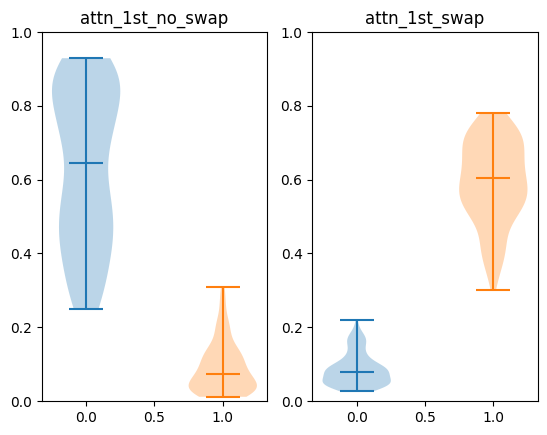

[0.09293616 0.581418  ]
[0.6228579  0.10284919]


In [1]:
# %%
"""
Import libraries, model, and datasets
"""
import sys
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import shutil
import torch

src_dir = os.getcwd()
src_dir = os.path.abspath(os.path.join(src_dir, '..')) + '/src'  # Adjust the path as needed
print(src_dir)
sys.path.append(src_dir)

import MLC_utils as utils
import MI.model_backtrack as backtrack
import MI.model_perturbation as perturbation

src_dir = Path(src_dir)
model_path = src_dir / 'out_models' / 'net-HookedBIMLSmall.pt'
dataset_path = src_dir / 'test_data_long' 
single_trial_path = dataset_path / 'single_trial'
null_dataset_path = dataset_path / 'null_dataset.pt'


net, dataset = utils.load_net_and_dataset(model_path=model_path, 
                                              dataset_path=dataset_path, 
                                              null_dataset_path=null_dataset_path)

perturbation_analyzer = perturbation.Analyzer(dataset=dataset, net=net)

# %%
perturbation_analyzer.perturb_dec_cross_1_5_k(block = 'dec',layer = 1, type = 'cross', head = 5)